## Idoven Data Science Challenge by Gonca Toprak
Implemented solution can be runned here. The functions are defined in the ECG_tools.py file and imported. Relevant code explanations can be found in ECG_tools.py file.

In order to run the notebook, ECG_tools.py and necessary libraries are imported.

In [1]:
import ECG_tools
import pandas as pd
import ast
import warnings
warnings.filterwarnings("ignore")

The database path is defined to be able to read the PTB-XL database. Metadata is taken from the dataset itself and downsampled versions of the records are used. Data is loaded by using the load_raw_data function. It takes metadata, sampling rate which is 100 Hz for downsampled versions and data path finally. While creating the load_raw_data, the example given in the PTB-XL database website is inspired. 

In [2]:
path = 'C:/Users/gonca/OneDrive/Masaüstü/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/'
metadata_from_database = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')
sampling_rate = 100

data = ECG_tools.load_raw_data(metadata_from_database, sampling_rate, path)

To get corresponding annotations, metadata is used. Since there is another CSV file that defines the scp codes, there was a need for some data manipulations on the metadata. For each ECG, first, scp code is taken from the ptbxl_database.csv file and their corresponding diagnostic class and diagnostic descriptions are taken from the scp_statements.csv file. To do so, the aggregate_diagnostic function is created. 

In [3]:
# evaluate string to being processible  
metadata_from_database['scp_codes'] = metadata_from_database['scp_codes'].apply(lambda x: ast.literal_eval(x))

In [4]:
# take the first column of the scp_statemnets.csv file as index which give diagnostics
scp_statements = pd.read_csv(path + 'scp_statements.csv', index_col=0) 

# take scp_statements values where it is defined
scp_statements = scp_statements[scp_statements['diagnostic'] == 1]

In [5]:
diagnostic_class, diagnostic_superclass = ECG_tools.aggregate_diagnostic(metadata_from_database['scp_codes'], scp_statements)  

To be able to plot ECGs as readable by doctors, the plot_ecg function is defined. To provide more information on ECGs, the corresponding patient ID, diagnostic class, diagnostic description and age are given in the plots. The plot_ecg function plots and provides information for the desired number of inputs. In this notebook, it is taken as 10 but you can give more or less if you like. The plot_ecg function is created with the help of the ecg_plot library. 

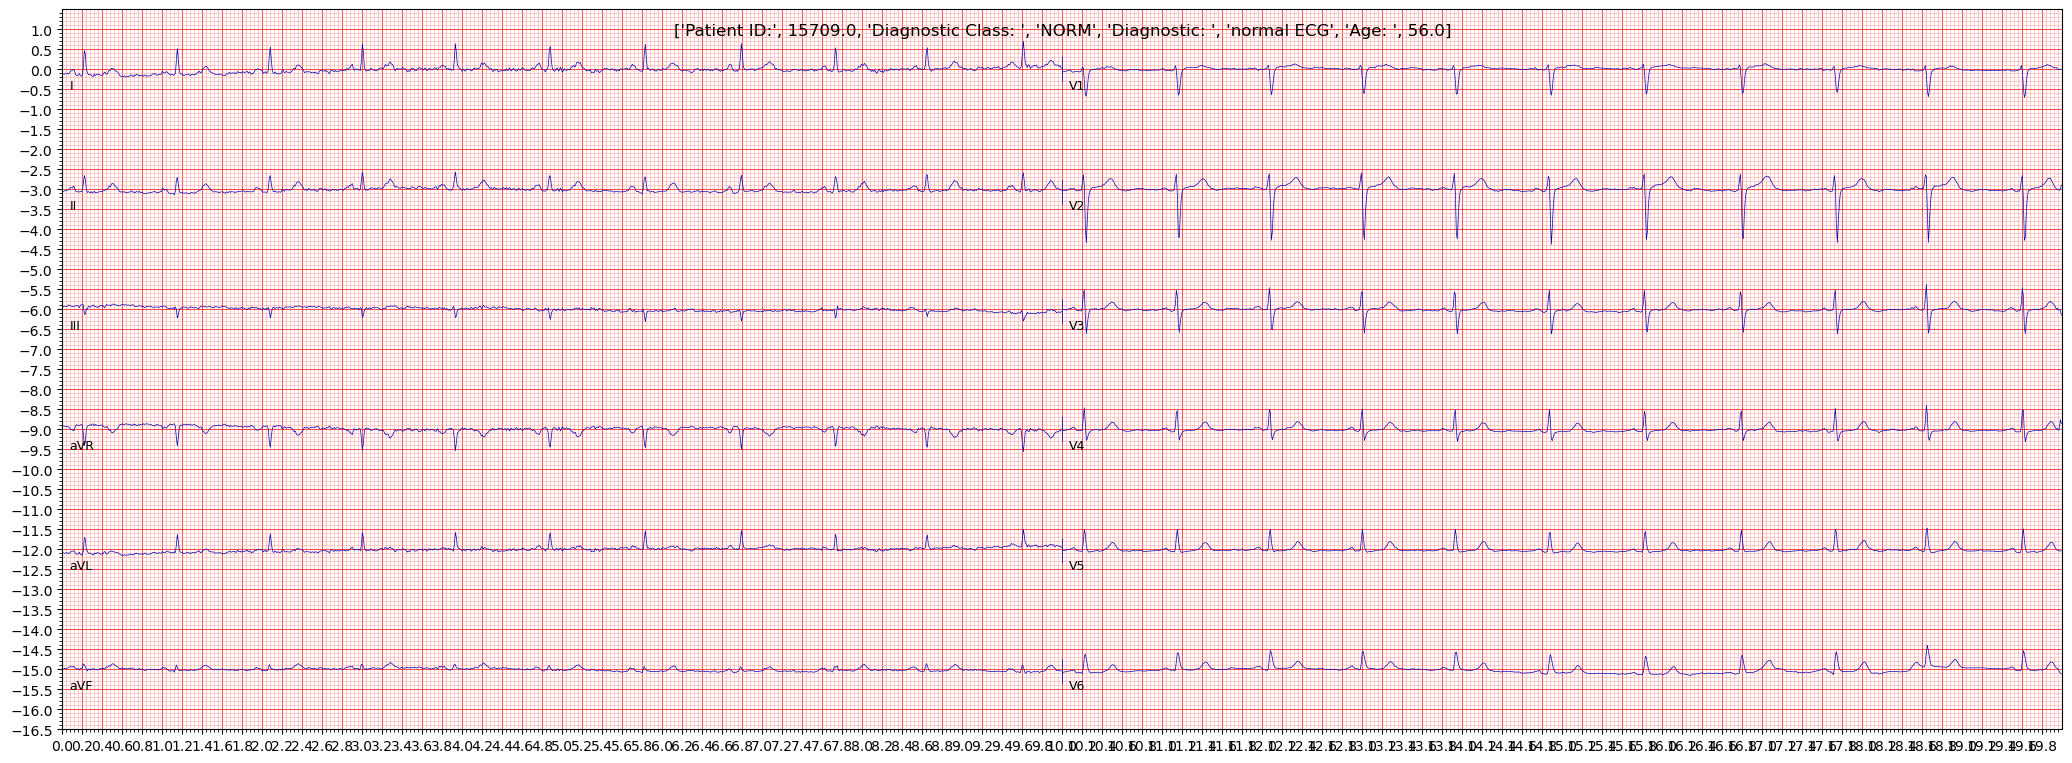

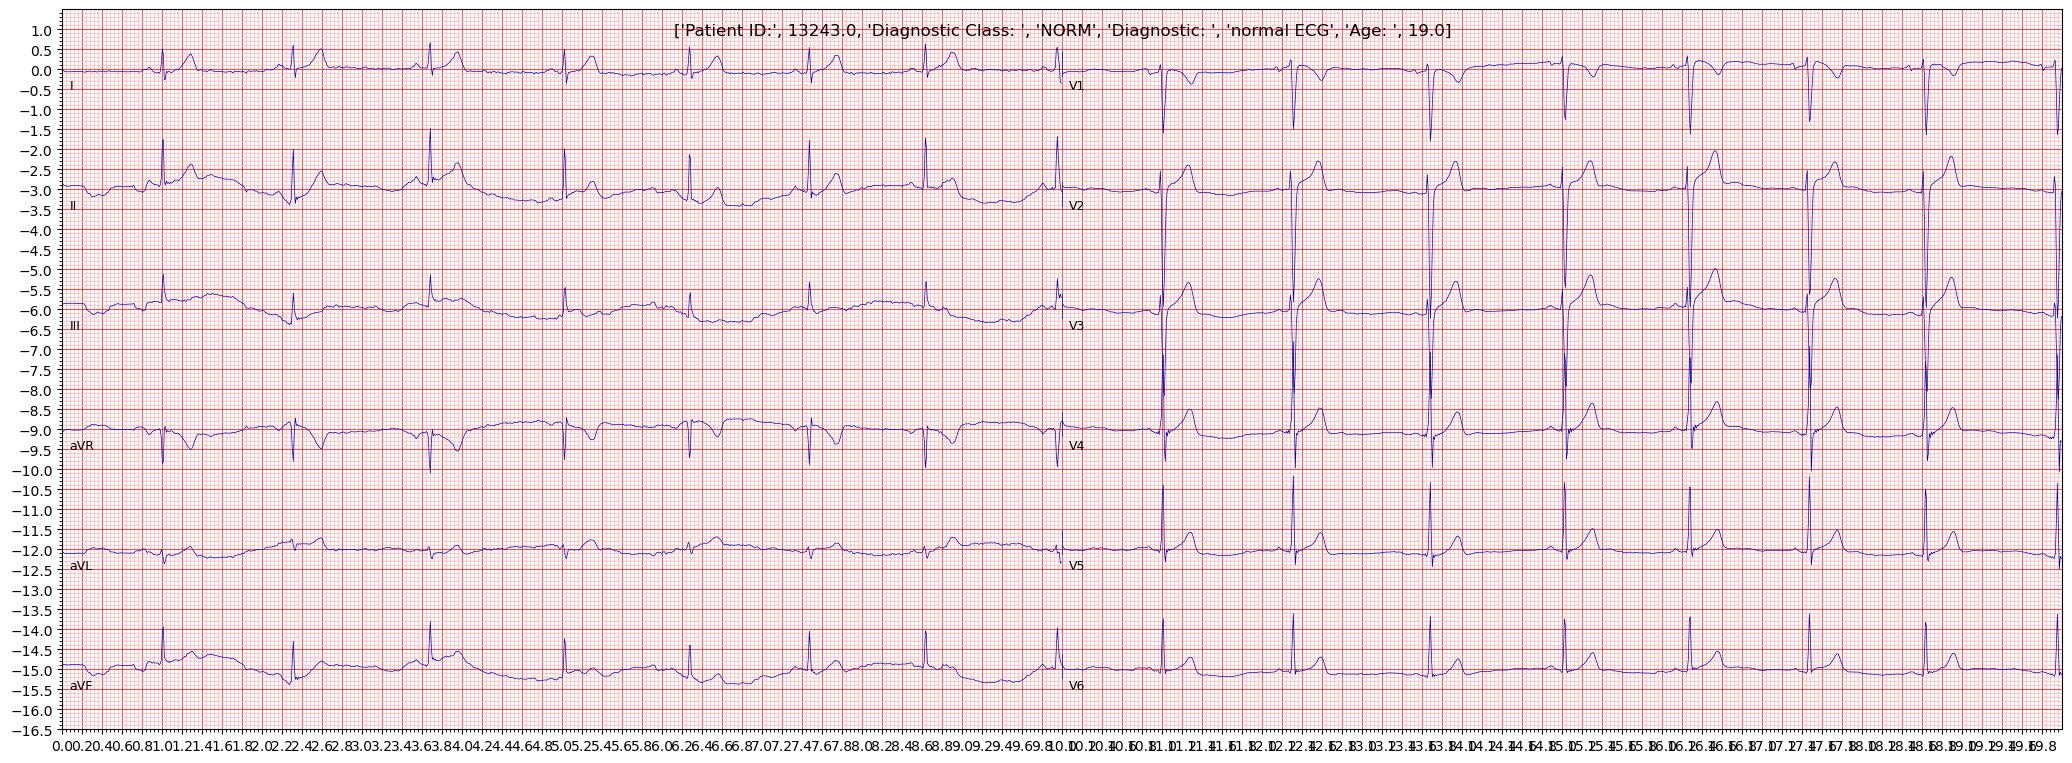

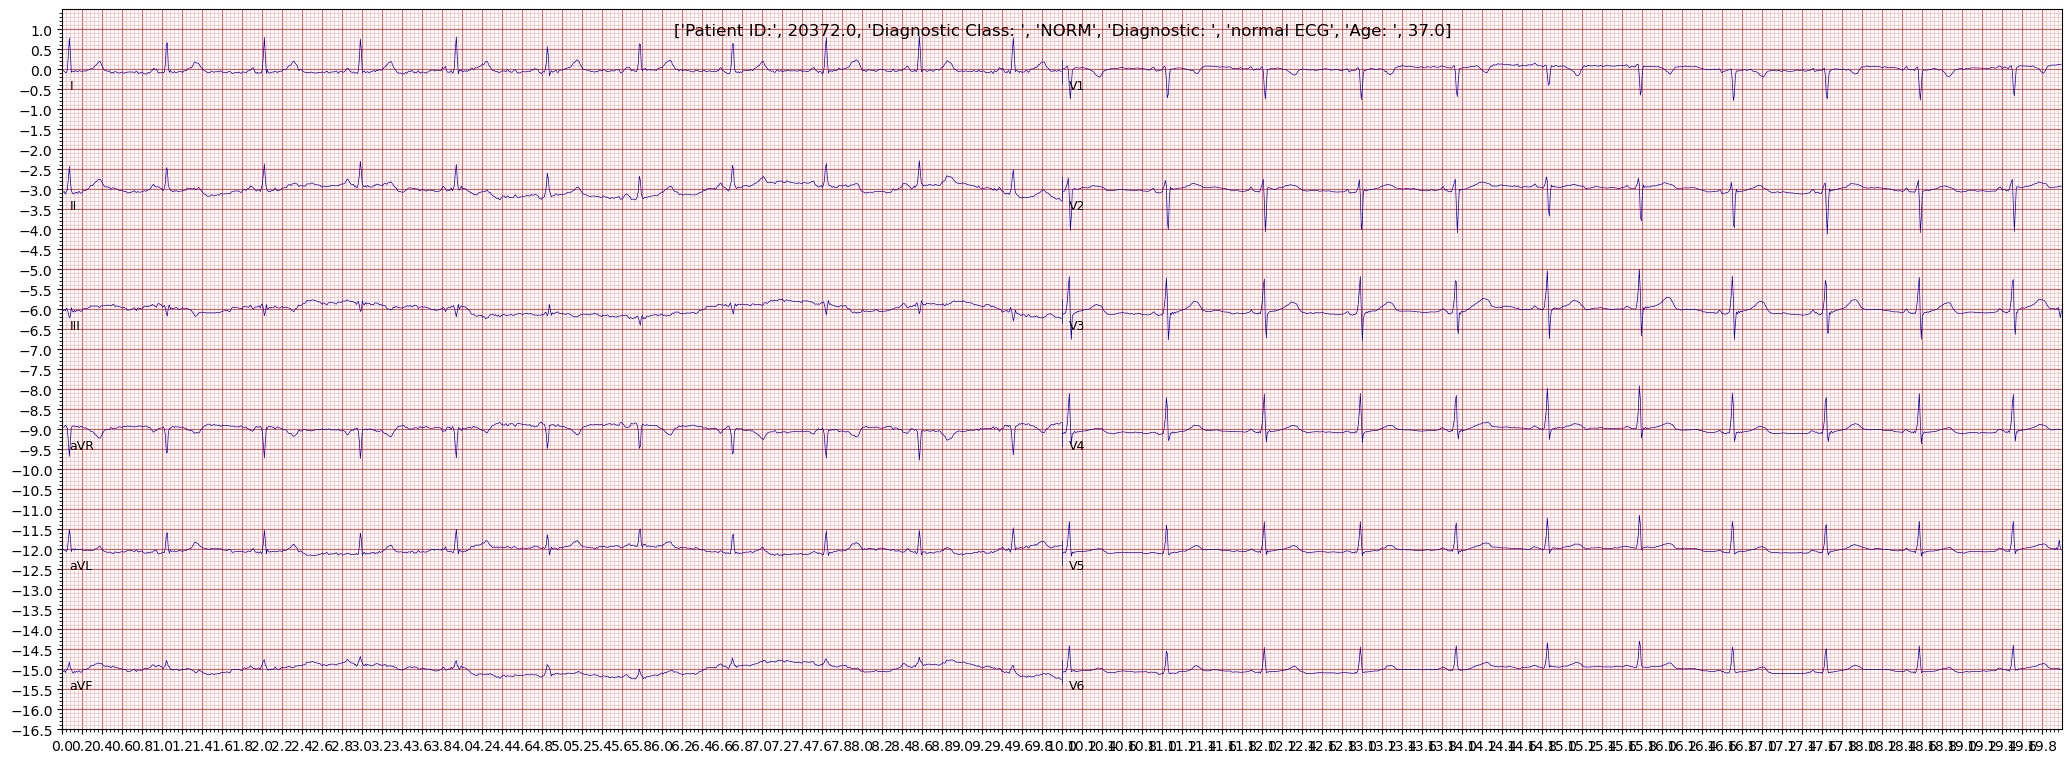

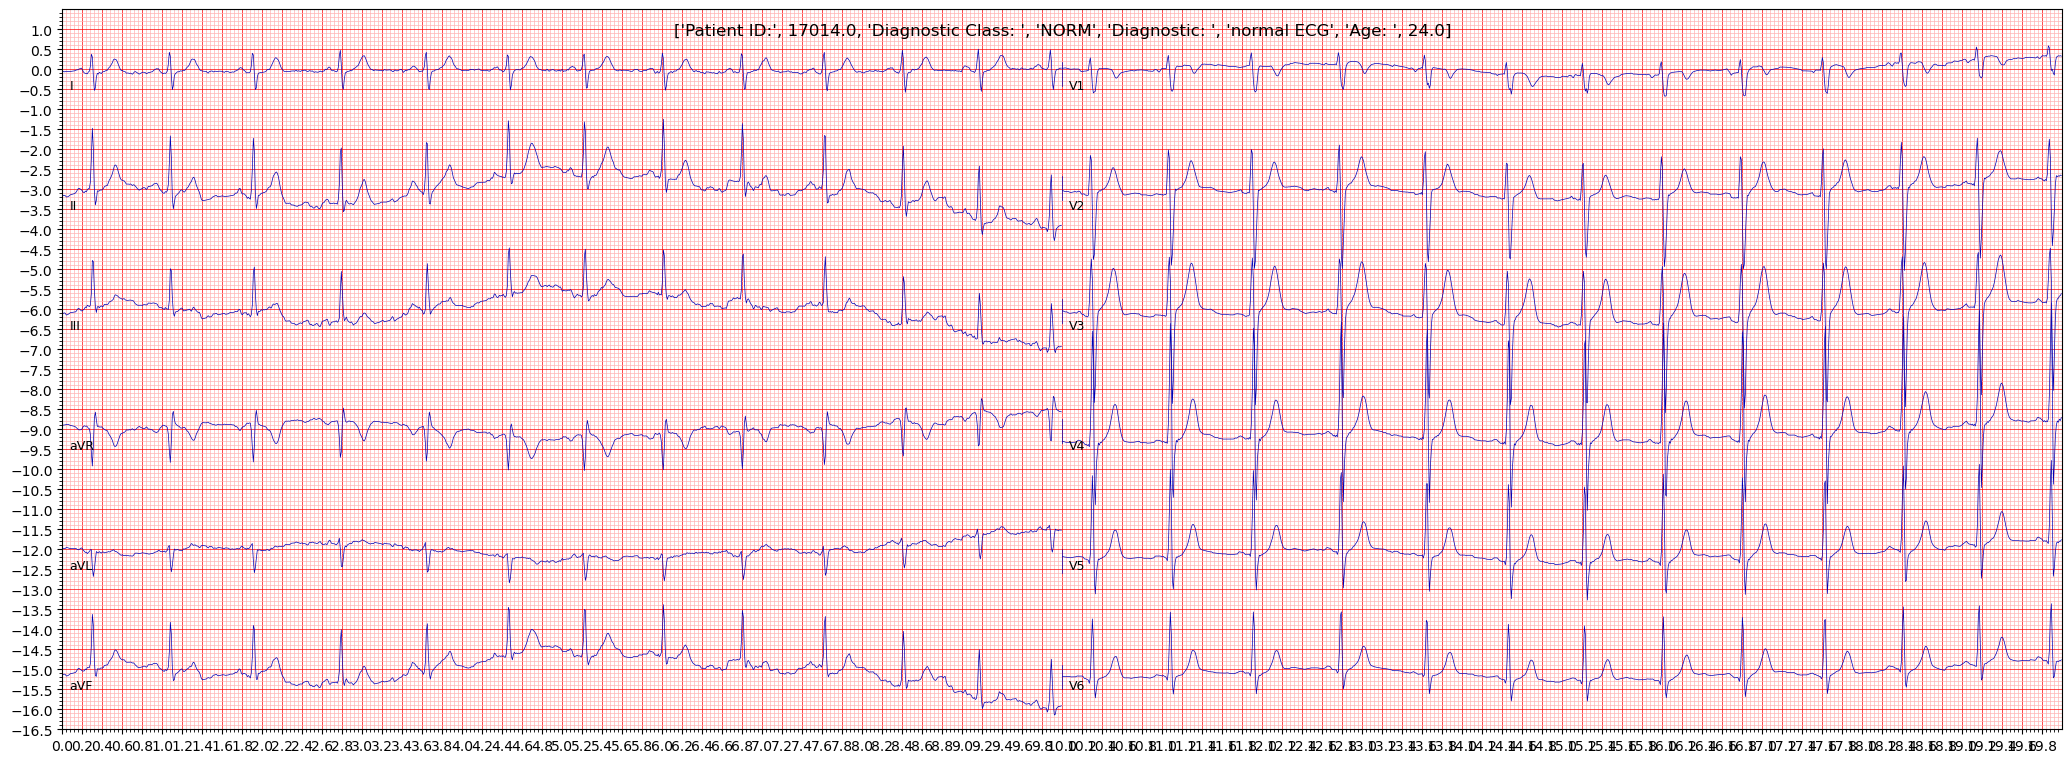

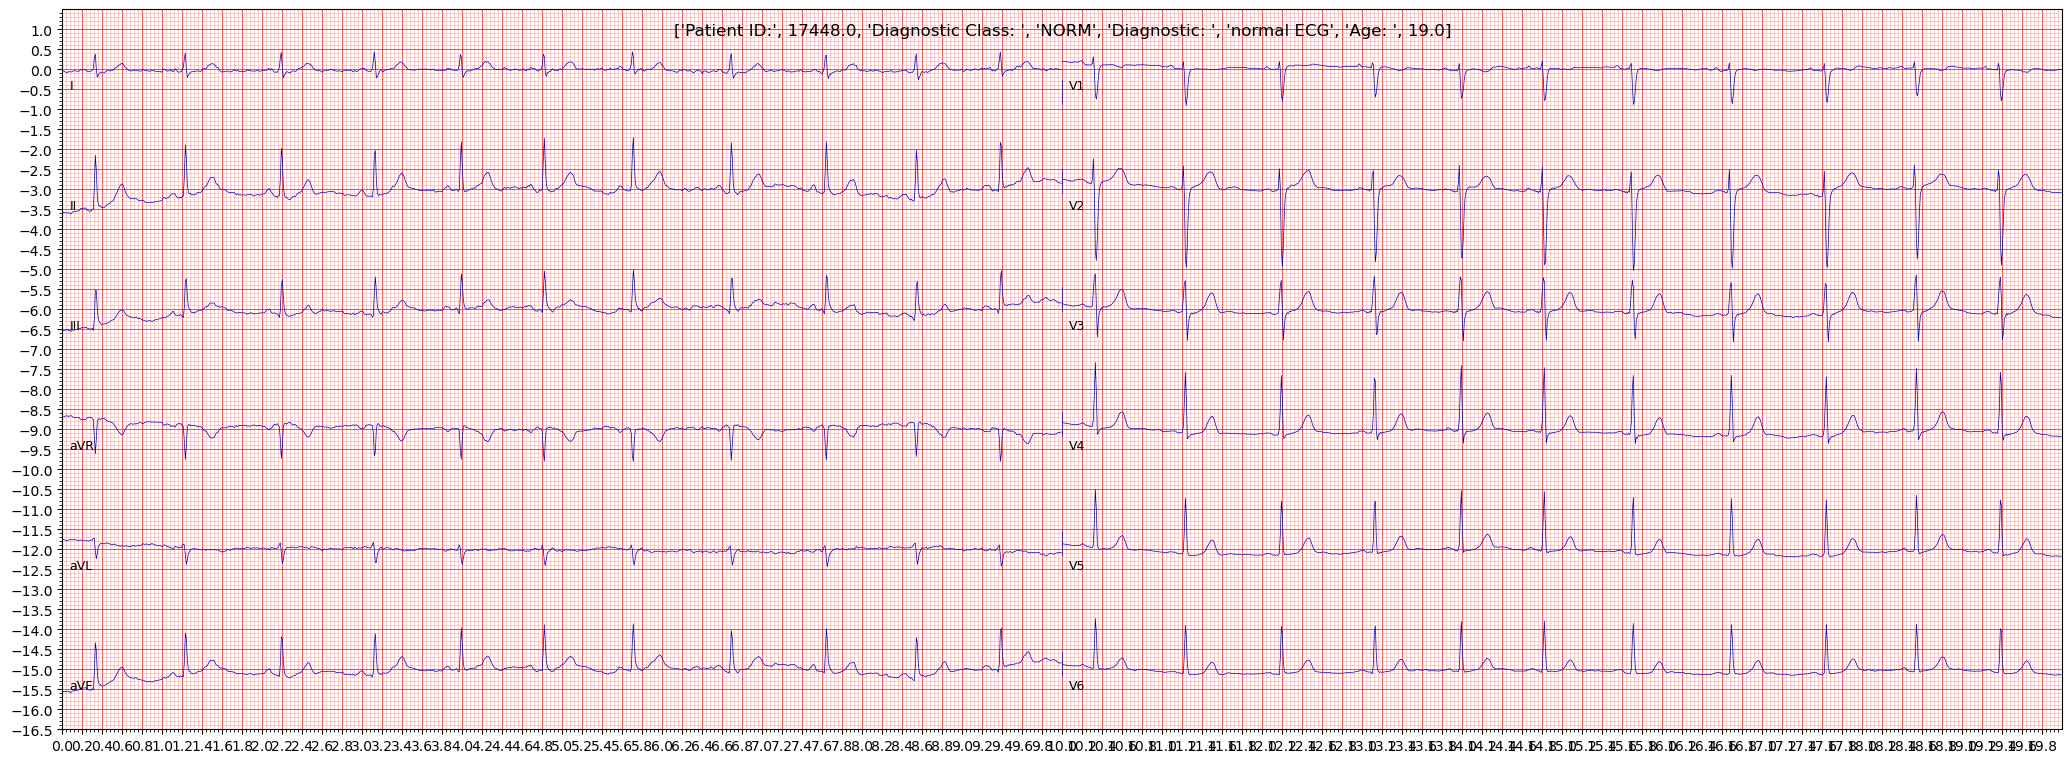

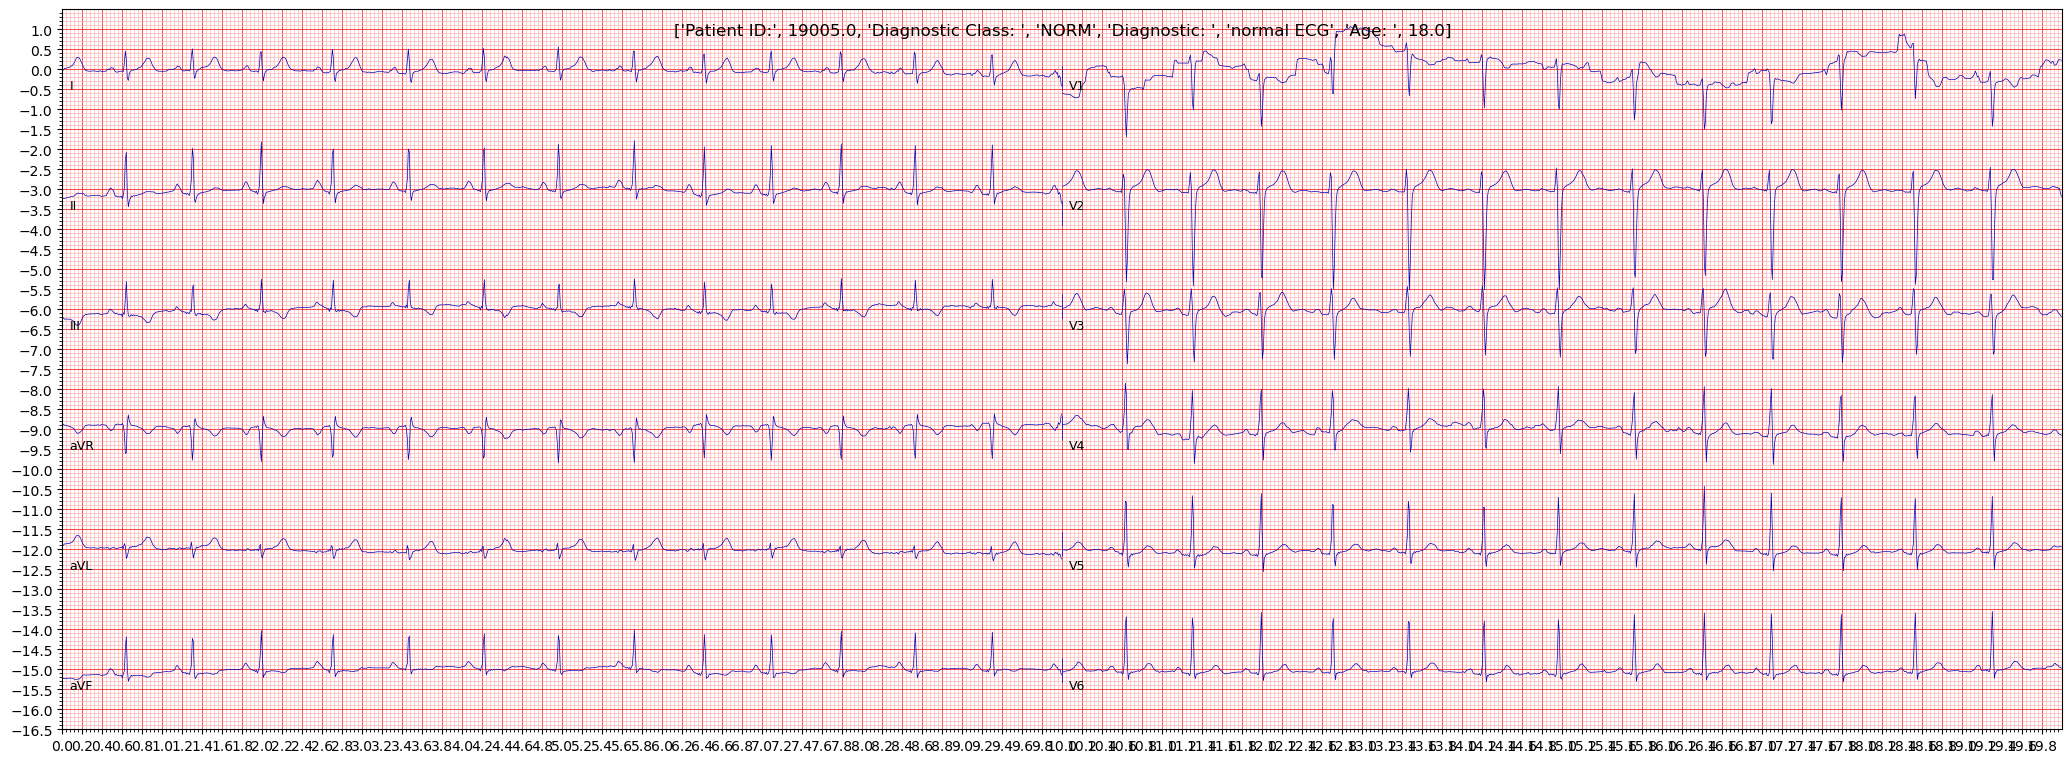

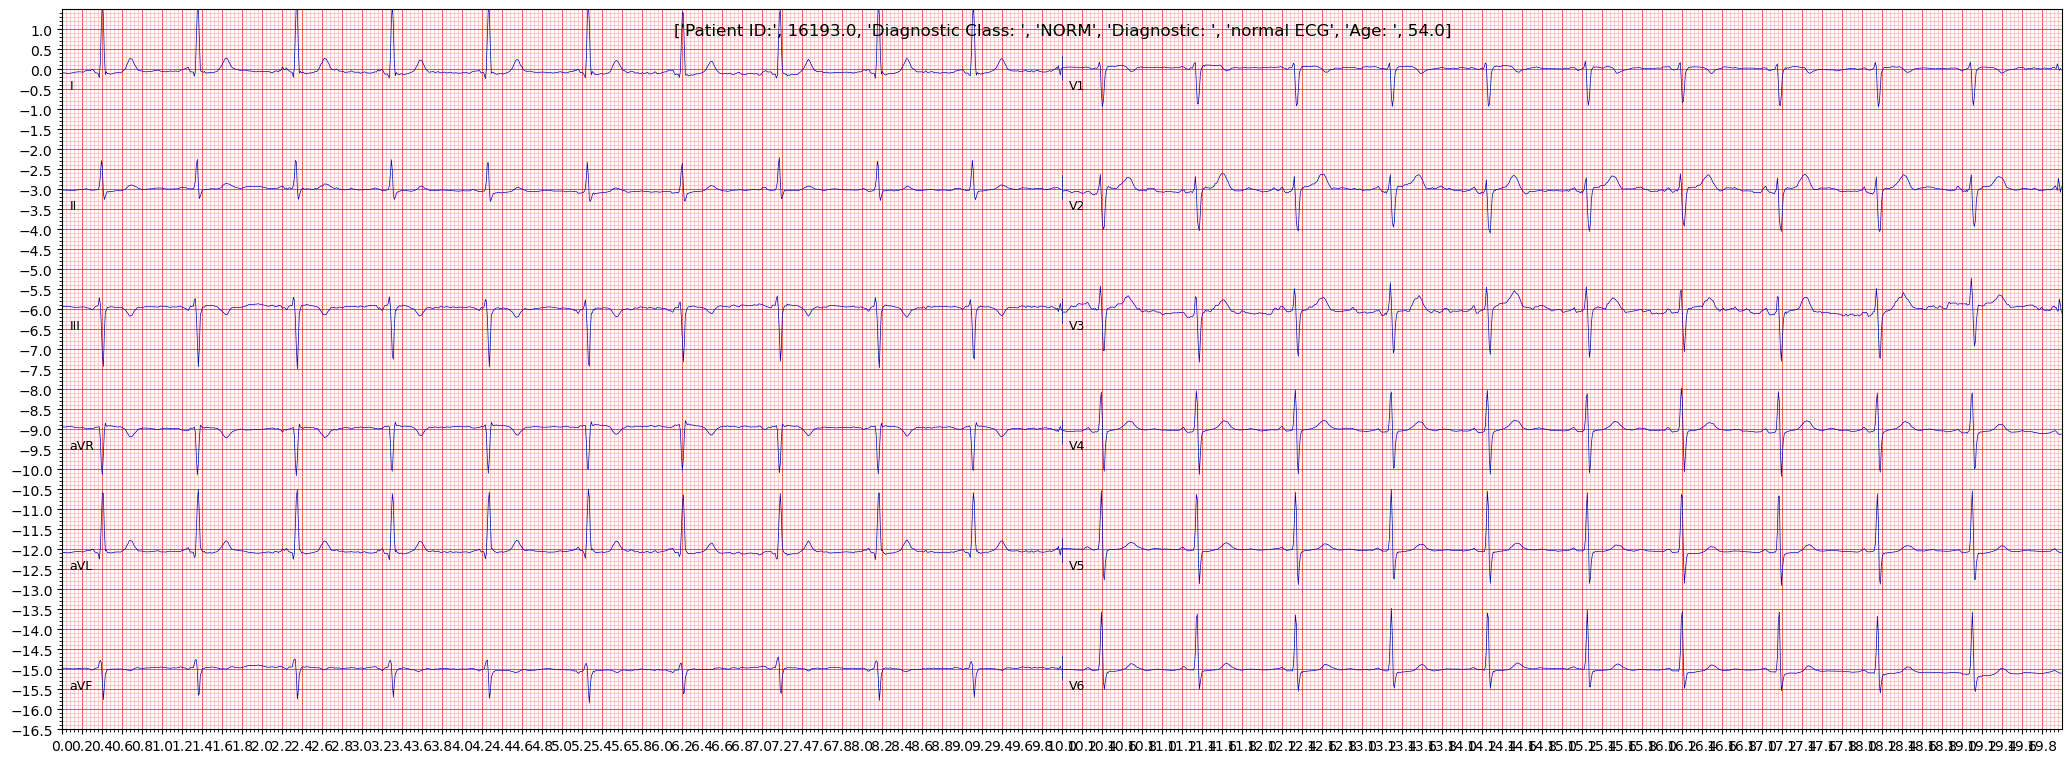

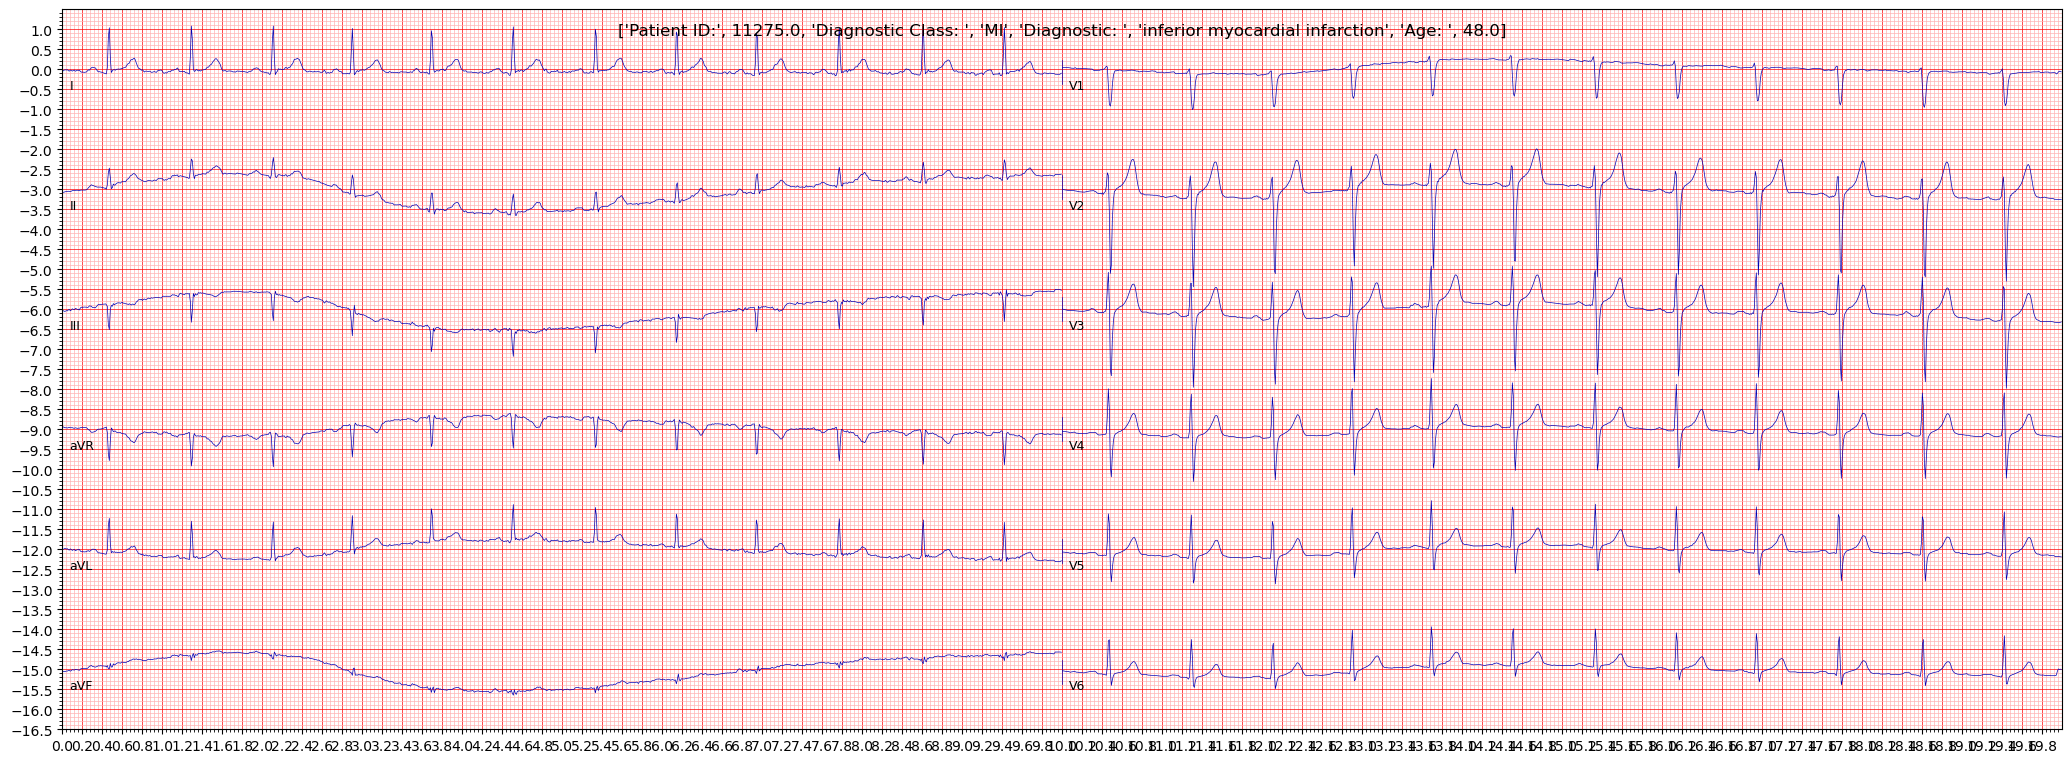

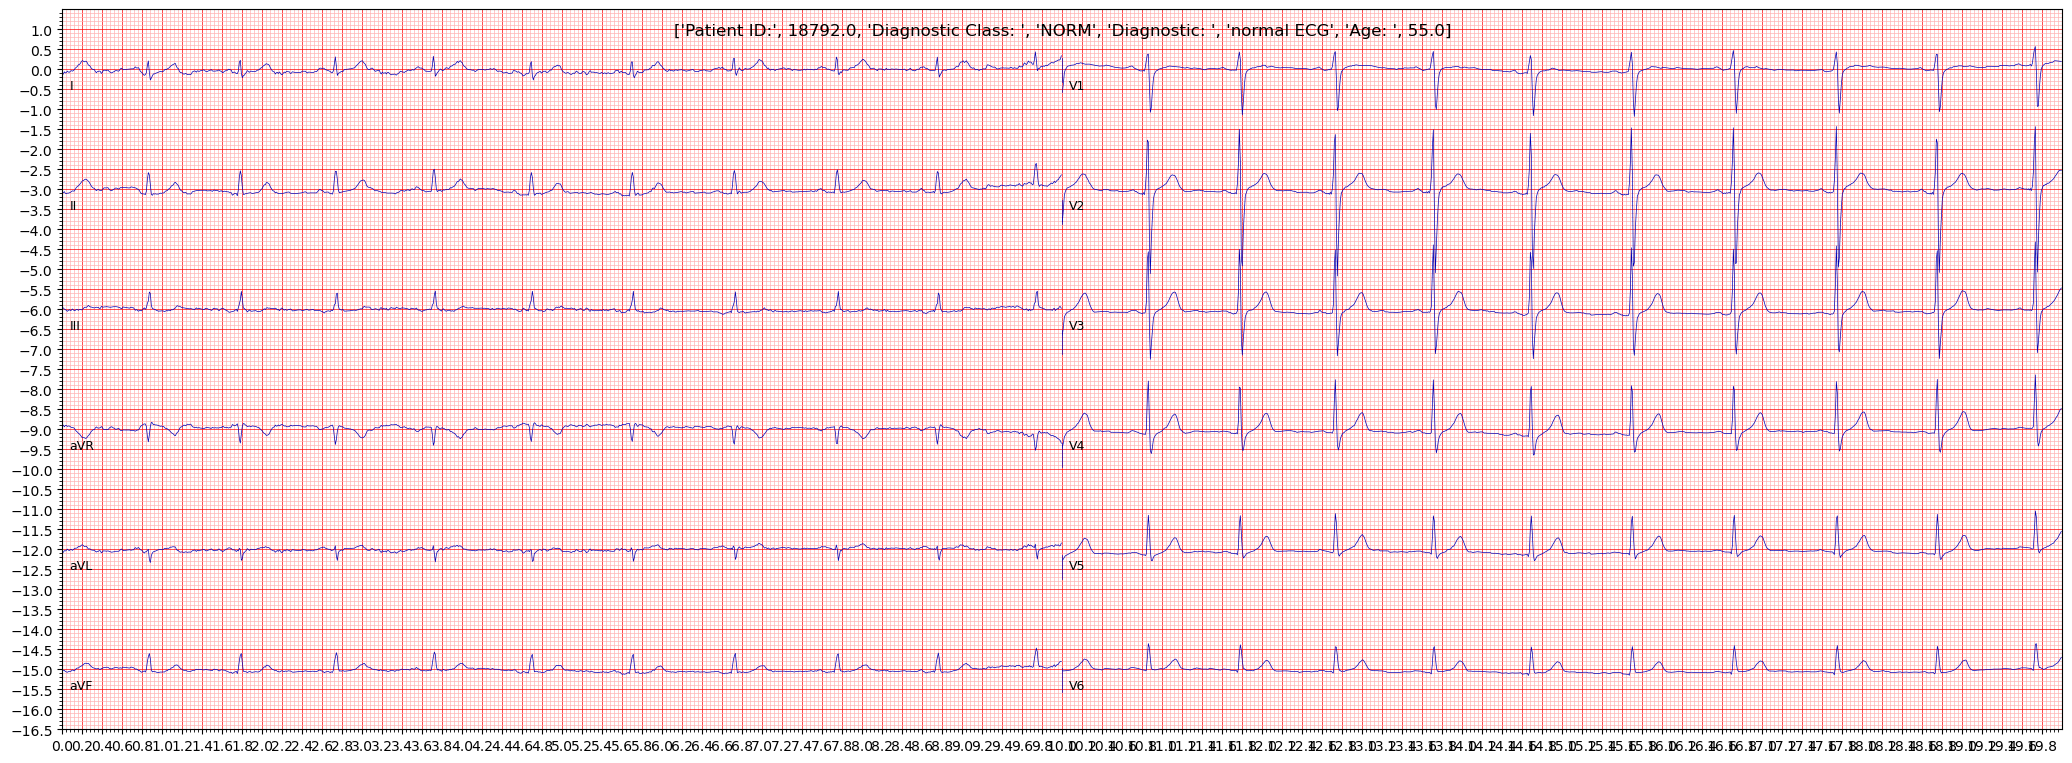

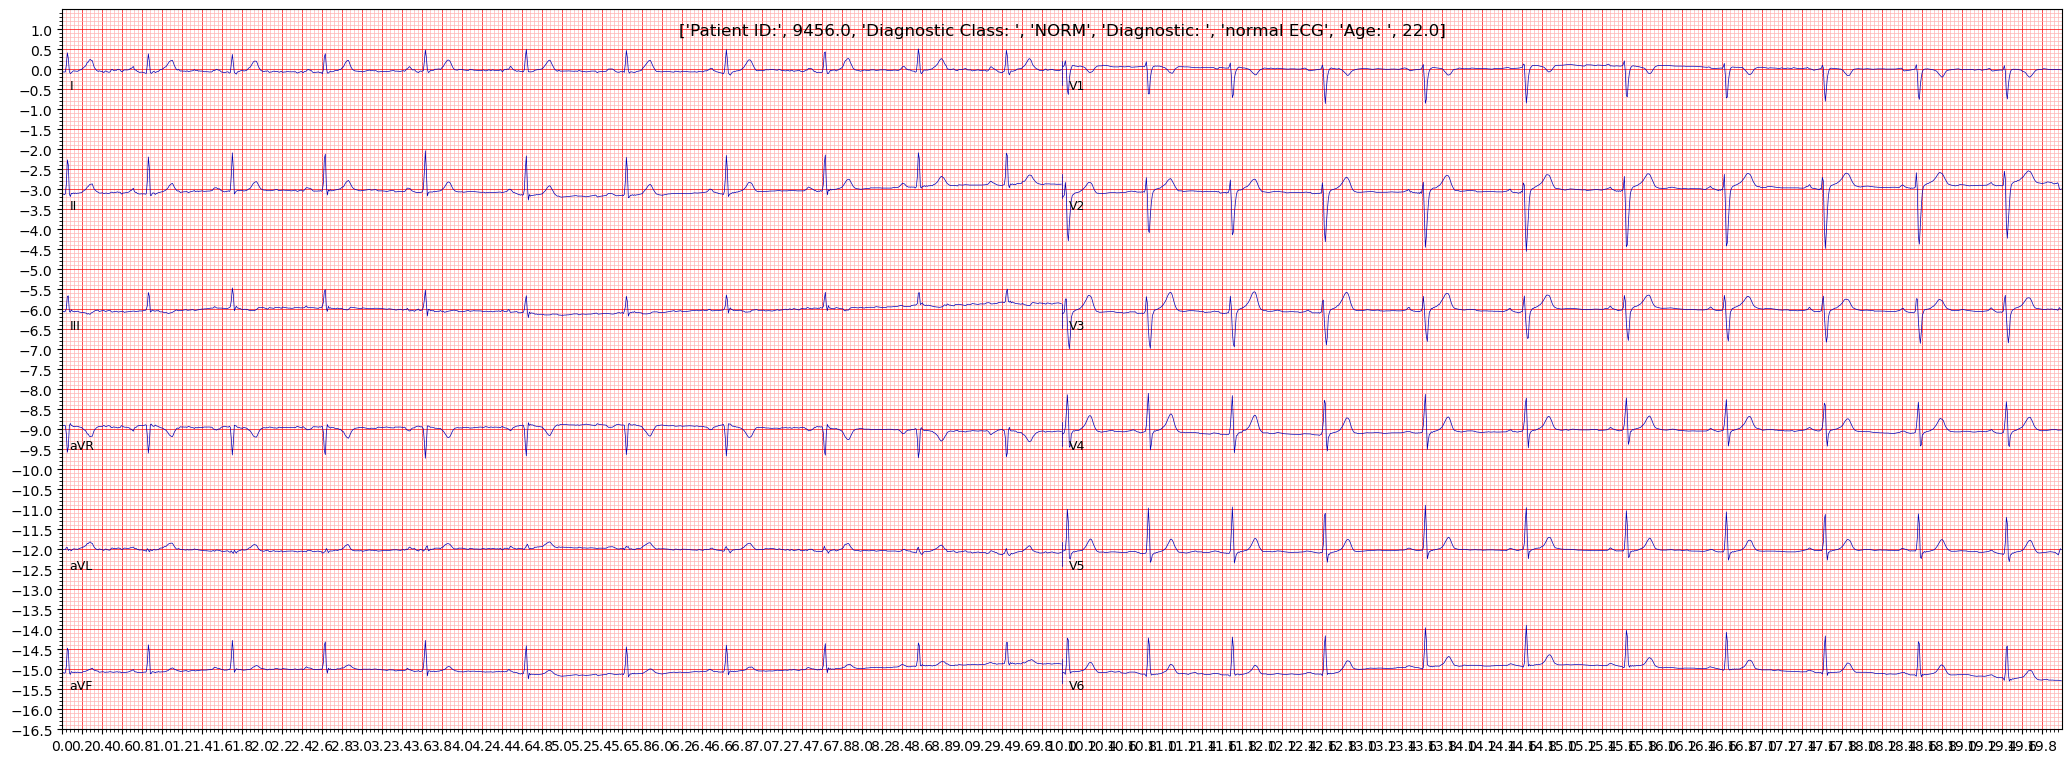

In [6]:
ECG_tools.plot_ecg(data, 10, metadata_from_database, diagnostic_class, diagnostic_superclass)

Since R peak locations are already given in the metadata, R peak locations are taken from the metadata (Could also be done with Pan-Tompkins algorithm implementation). In order to mark them on ECGs, corresponding signal values are calculated. To do so, the get_r_peaks function is created. Another function called plot_r_peaks is again created to plot the desired number of inputs. The plot_r_peaks function also provides the corresponding patient ID. 

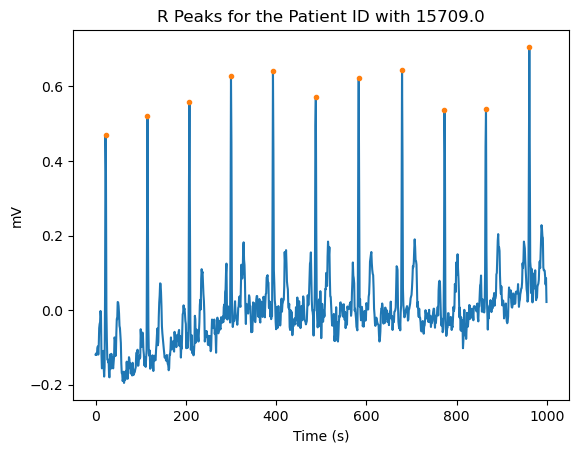

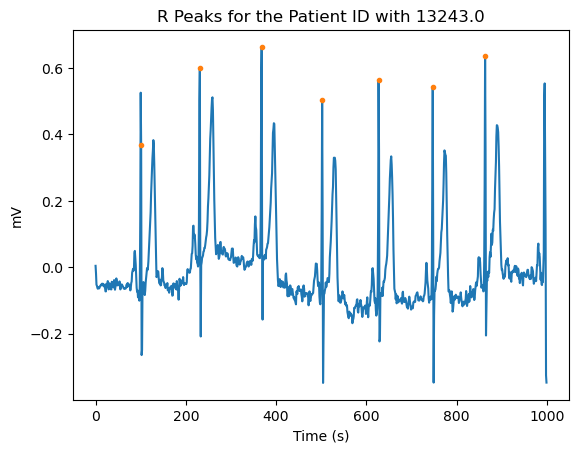

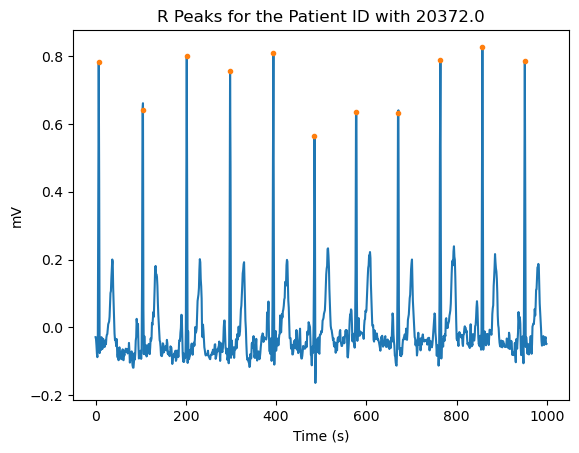

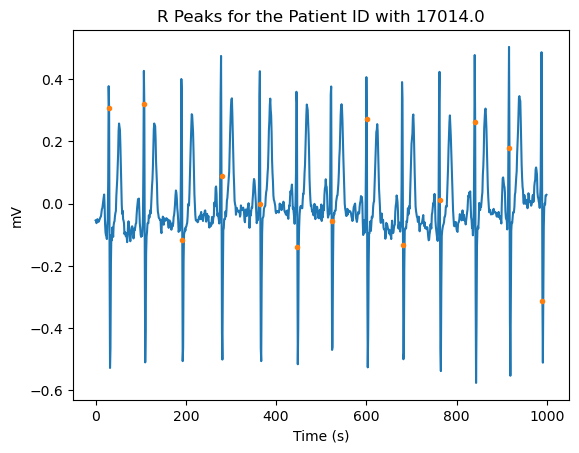

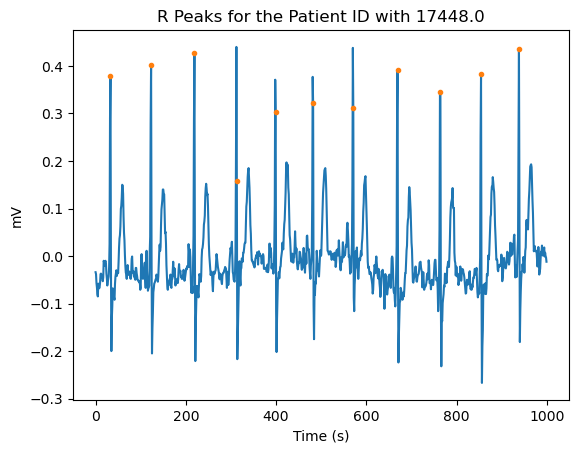

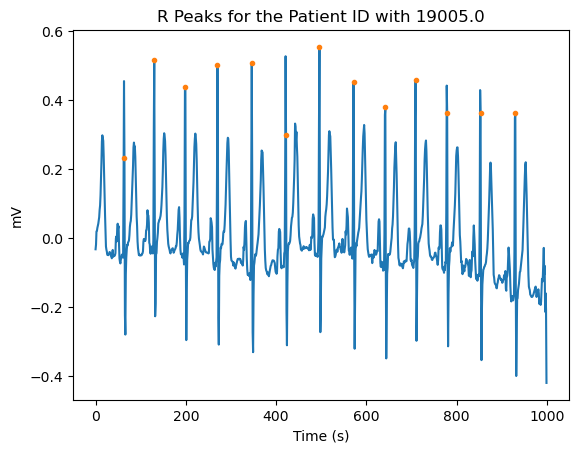

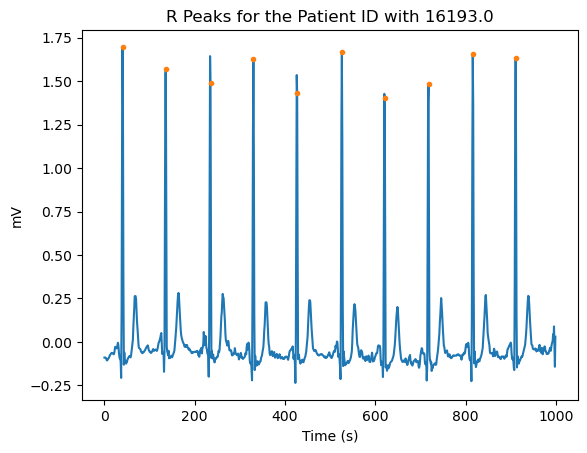

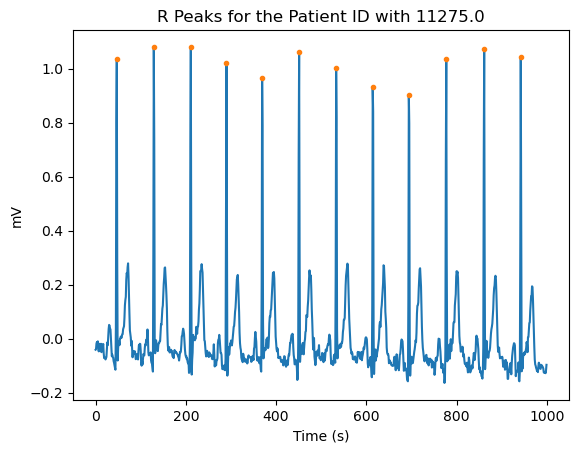

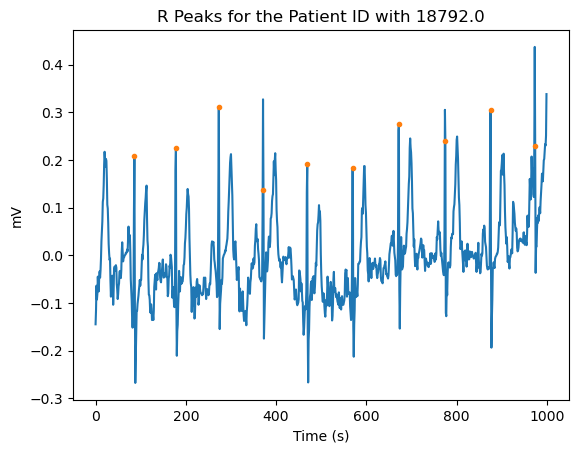

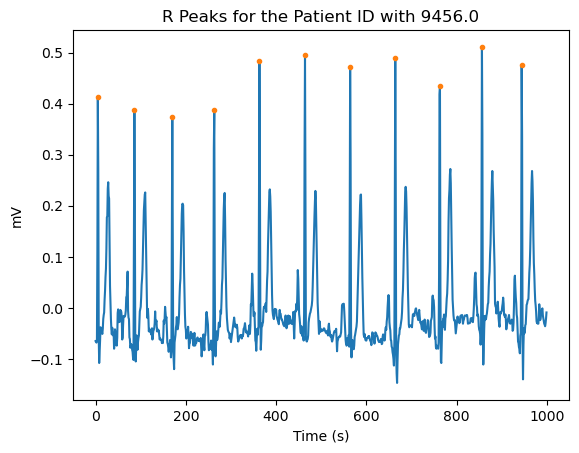

In [7]:
r_peaks, r_peak_values, ecg = ECG_tools.get_r_peaks(data, 10, metadata_from_database)
ECG_tools.plot_r_peaks(ecg, r_peaks, r_peak_values, metadata_from_database)

Finally, to calculate heartbeat, average and total heartbeat in the signal, the calculate_HRV function is created which gives a data frame with calculated values. It again calculates the heart beat-relavent information for the desired number of inputs. To create the calculate_HRV function, heartpy library is used. Here, the total heartbeat is calculated as the number of the R peaks in the signal. Average heartbeat equals total heartbeat/heartbeat (bpm).

In [8]:
heart_rate_variablity = ECG_tools.calculate_HRV(data, 10, metadata_from_database)

heart_rate_variablity

Patient ID  Heart Beat (bpm)  Total Heart Beat  Average Heart Beat
0     15709.0         63.897764                11            5.808888
1     13243.0         47.182176                 7            6.740311
2     20372.0        135.000000                27            5.000000
3     17014.0         75.093867                13            5.776451
4     17448.0         65.663475                10            6.566347
5     19005.0         82.191781                11            7.471980
6     16193.0         61.997704                10            6.199770
7     11275.0        107.142857                26            4.120879
8     18792.0        229.885057                29            7.927071
9      9456.0        149.068323                26            5.733397

## Comments

- The given dataset makes sense for anyone who wants to be in this position. However, working with ECG signals requires lots of signal processing background as well as a medical ECG reading background. In the literature, there are lots and lots of studies that depend on formal signal processing methods, machine learning or deep learning approaches. In order to develop such methodologies, a literature review should be done carefully to achieve the task requirements.

- I wanted to keep my solution as simple as possible since there are very inspiring libraries (e.g. heartpy). I also wanted to implement ECG classification by using diagnostic information I got in the notebook but I needed more time to do so. FFuture work will definitely be adding ECG classification models to the notebook. I really enjoyed and learned lots of things regarding the develop a project on ECG analysis. Thank you very much for the opportunity.    

## References

- https://physionet.org/content/ptb-xl/1.0.2/
- https://medium.com/@roszcz/machine-learning-for-medicine-qrs-detection-in-a-single-channel-ecg-signal-part-1-data-set-be36f70bbd38
- Strodthoff, N., Wagner, P., Schaeffter, T., & Samek, W. (2020). Deep learning for ECG analysis: Benchmarks and insights from PTB-XL. IEEE Journal of Biomedical and Health Informatics, 25(5), 1519-1528.
- Ali, R., Priyanga, P., Abualsauod, E. H., Zafrullah, S. N., Serbaya, S. H., & Halifa, A. (2022). A Machine Learning Approach for the Detection of QRS Complexes in Electrocardiogram (ECG) Using Discrete Wavelet Transform (DWT) Algorithm. Computational Intelligence and Neuroscience: CIN, 2022.
- Cai, W., & Hu, D. (2020). QRS complex detection using novel deep learning neural networks. IEEE Access, 8, 97082-97089.
- https://www.kaggle.com/datasets/bjoernjostein/ptbxl-electrocardiography-database